### **UFC Fighters Analysis Using Clustering and Dimension Reduction Methods**  


 - **Khamidov Mirzalonboy**
 - **id : 474561**

## Overview
The dataset contains information about UFC (Ultimate Fighting Championship) matches, fighters, and their performance metrics. It includes a mix of numerical and categorical features related to fighter statistics, match outcomes, and betting odds. Some columns have a significant number of missing values, especially related to specific statistics.The dataset is designed for performance analysis, pattern discovery (e.g., clustering), and predictive modeling of fighter performance and match outcomes and of course dataset was gathered from real ufc fights and dates of the fights matches to real fight dates i cheked it from internet.
I took dataset from:  https://www.kaggle.com/datasets/asaniczka/ufc-fighters-statistics


- **Fighter Statistics**:
  - `wins`, `losses`, `draws`: Historical fight results for each fighter.
  - `height_cm`, `weight_in_kg`, `reach_in_cm`: Physical attributes of fighters.
  - `significant_strikes_landed_per_minute`: A measure of striking efficiency.
  - `average_takedowns_landed_per_15_minutes`: Effectiveness in takedowns.


### Setting up an environment and packages for working with data.

In [369]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


the file path to a CSV and loading dataset

In [371]:
file_path = Path('ufc.csv')

In [373]:
df = pd.read_csv(file_path)

In [375]:
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


Displaying data columns and information about dataset

In [377]:
df.columns

Index(['name', 'nickname', 'wins', 'losses', 'draws', 'height_cm',
       'weight_in_kg', 'reach_in_cm', 'stance', 'date_of_birth',
       'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes'],
      dtype='object')

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

Summary of statistics for the numerical columns and distribution of my data

In [381]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


 identifing the number of missing values in each column.

In [383]:
missing_values = df.isnull().sum()
missing_values

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In [385]:
missing_columns = missing_values[missing_values > 0]
if missing_columns.empty:
    print("No missing values in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_columns)

Columns with missing values:
nickname         1854
height_cm         298
weight_in_kg       87
reach_in_cm      1927
stance            823
date_of_birth    1135
dtype: int64


In [387]:
missing_data = df.isnull()

 The visualizetion of  missing data  using three plots which are :
1. A heatmap shows where the missing values are.
2. A bar chart displays the number of missing values per column.
3. A scatter plot highlights the exact positions of missing values in the dataset.


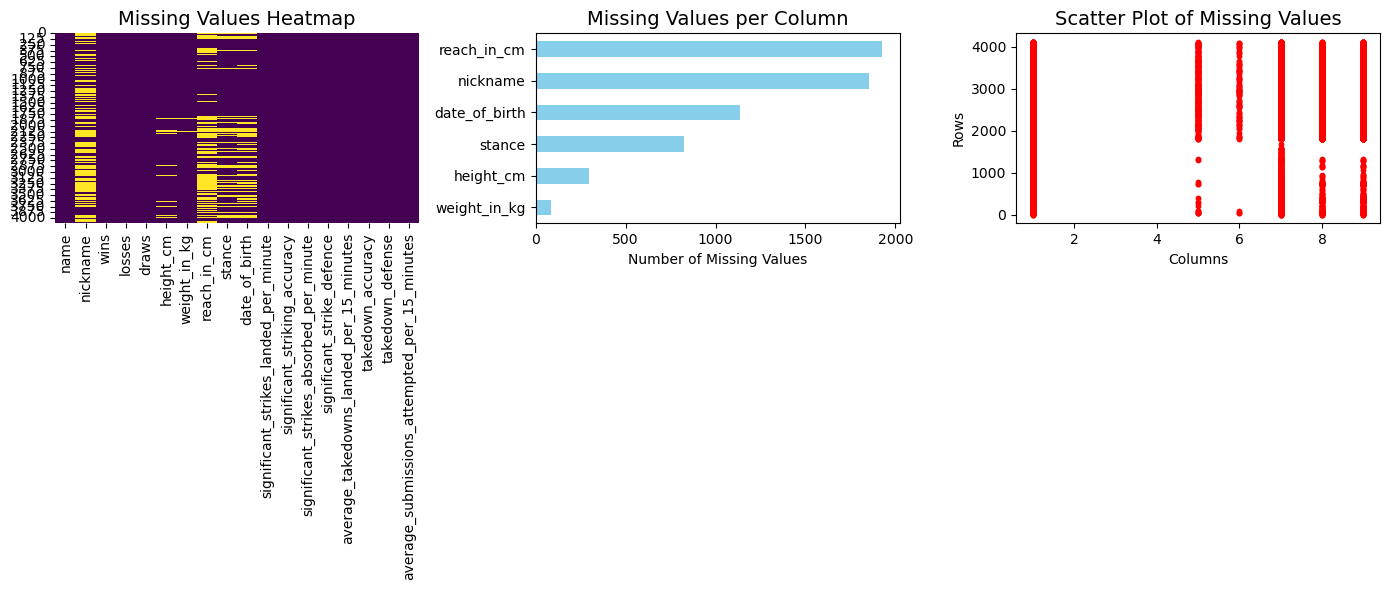

In [389]:
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

missing_data = df.isnull()
sns.heatmap(missing_data, cmap='viridis', cbar=False, ax=axes[0])
axes[0].set_title('Missing Values Heatmap', fontsize=14)

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0] 

if not missing_counts.empty:
    missing_counts.sort_values().plot(kind='barh', color='skyblue', ax=axes[1])
    axes[1].set_title('Missing Values per Column', fontsize=14)
    axes[1].set_xlabel('Number of Missing Values')
else:
    axes[1].text(0.5, 0.5, 'No Missing Values', ha='center', va='center', fontsize=14, color='green')
    axes[1].set_title('Missing Values per Column', fontsize=14)

axes[2].scatter(np.where(df.isnull())[1], np.where(df.isnull())[0], color='red', s=10)
axes[2].set_title('Scatter Plot of Missing Values', fontsize=14)
axes[2].set_xlabel('Columns')
axes[2].set_ylabel('Rows')

plt.tight_layout()
plt.show()

# Handling missing data 

In [391]:
from sklearn.impute import SimpleImputer

critical_columns = [
    'wins', 'losses', 'draws', 
    'height_cm', 'weight_in_kg', 'reach_in_cm',
    'significant_strikes_landed_per_minute', 
    'average_takedowns_landed_per_15_minutes'
]

imputer = SimpleImputer(strategy='median')
df[critical_columns] = imputer.fit_transform(df[critical_columns])

if 'stance' in df.columns:
    df['stance'] = df['stance'].fillna('Unknown')

threshold = len(df.columns) * 0.5
df = df.dropna(thresh=threshold)

print("Dataset Info After Handling Missing Values:")
print(df.info())


Dataset Info After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   float64
 3   losses                                        4111 non-null   float64
 4   draws                                         4111 non-null   float64
 5   height_cm                                     4111 non-null   float64
 6   weight_in_kg                                  4111 non-null   float64
 7   reach_in_cm                                   4111 non-null   float64
 8   stance                                        4111 non-null   object 
 9   date_of_birth      

At the beginning of the project, I had 18 columns in the dataset. However, I decided to focus on only **8 critical_columns** for imputation. Here's why I chose to do that: The columns I selected (such as **wins, losses, height, weight, reach, significant strikes, and takedowns**) are the most important for understanding a fighter's performance. These columns contain key information that I need to analyze the fighters' abilities and predict how well they might do in a fight. The columns I am focusing on have numerical values that are crucial for analyzing fighter performance. Missing data in these columns would make it difficult to make sense of how good or bad a fighter is. For example, **significant strikes** and **takedowns** are directly related to how well a fighter performs in a match. If these values are missing, my analysis could be incomplete.  Some columns, like **nickname**, **stance**, or **date_of_birth**, are not as important for the main analysis. Missing values in these columns are less likely to affect the outcome of my work. **Stance** and **nickname** can be filled in later if necessary, but they don't directly influence the fighter's performance in a fight. Also these columns are not numeric columns

I focused on the **critical_columns** because they are the most important for understanding and analyzing fighter performance. By filling in missing values for these columns, I make sure my analysis stays accurate and meaningful.


 Let's check result after handling data

In [393]:
missing_values = df.isnull().sum()
missing_values

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                          0
weight_in_kg                                       0
reach_in_cm                                        0
stance                                             0
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In this part we will  normalize selected columns in the DataFrame using Min-Max scaling, and then we create boxplots to visualize the distribution of the normalized data to detect any outliers. 
Each boxplot shows the spread and any unusual values for each column.

In [395]:
selected_columns

['wins',
 'losses',
 'draws',
 'height_cm',
 'weight_in_kg',
 'reach_in_cm',
 'significant_strikes_landed_per_minute',
 'average_takedowns_landed_per_15_minutes']

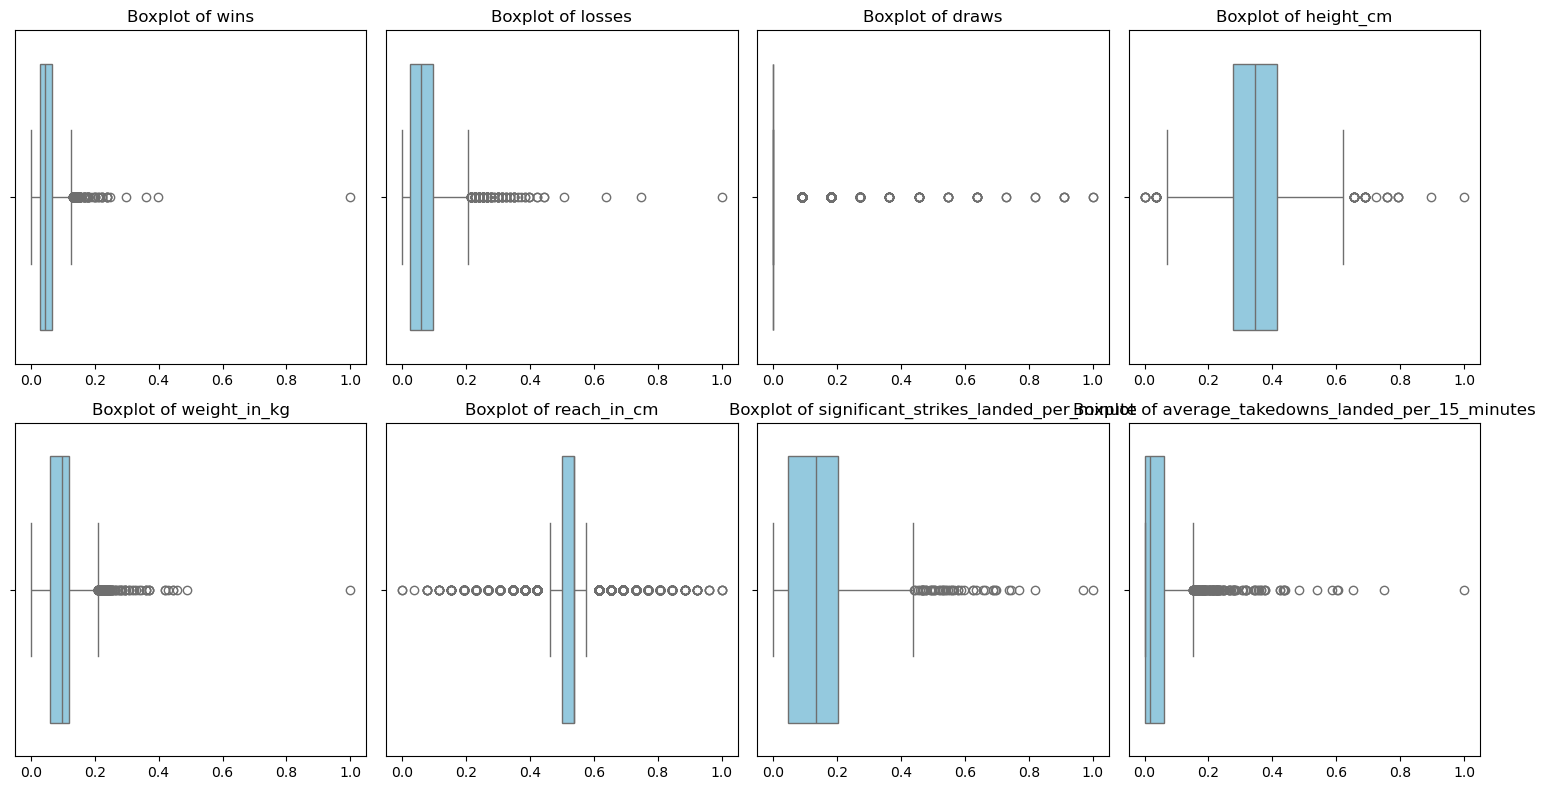

In [397]:
selected_columns = [
    'wins', 'losses', 'draws',
    'height_cm', 'weight_in_kg', 'reach_in_cm',
    'significant_strikes_landed_per_minute',
    'average_takedowns_landed_per_15_minutes'
]

scaler = MinMaxScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

plt.figure(figsize=(15, 8))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 4, i) 
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel("")
    plt.tight_layout()

plt.show()


In [399]:
print("Summary Statistics for Selected Columns (After Normalization):")
print(df[selected_columns].describe())

Q1 = df[selected_columns].quantile(0.25)
Q3 = df[selected_columns].quantile(0.75)
IQR = Q3 - Q1

print("\nInterquartile Range (IQR) for Each Column:")
print(IQR)

Summary Statistics for Selected Columns (After Normalization):
              wins       losses        draws    height_cm  weight_in_kg  \
count  4111.000000  4111.000000  4111.000000  4111.000000   4111.000000   
mean      0.048881     0.068992     0.024038     0.350297      0.098660   
std       0.037054     0.061491     0.074761     0.116217      0.058981   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.027668     0.024096     0.000000     0.275862      0.060138   
50%       0.043478     0.060241     0.000000     0.344828      0.097732   
75%       0.067194     0.096386     0.000000     0.413793      0.120276   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

       reach_in_cm  significant_strikes_landed_per_minute  \
count  4111.000000                            4111.000000   
mean      0.529845                               0.138103   
std       0.118148                               0.112799   
min       0.00000


 **Removing Unnecessary Columns:**
  In any data analysis, not all columns are useful for the task at hand. Columns like 'draws', 'nickname', 'date_of_birth', and 'stance' may not contribute meaningfully to the analysis or the final goal (e.g., clustering fighters or predicting their performance). By removing these columns, we reduce noise in the data and simplify the model, leading to more efficient analysis and better results. It also ensures that we focus on the columns that matter most for performance analysis (like wins, losses, height, reach, etc.).
 **Dropping Rows with Outliers**
 Outliers are extreme values that differ greatly from other data points. These can distort statistical analysis and machine learning models. By removing rows with outliers, we ensure that the analysis is not biased by extreme values that could skew the results. This leads to more accurate and reliable insights, especially when analyzing fighter performance (like wins, losses, or strike rates).


In [401]:
def handle_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    outlier_condition = (df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))
    outlier_counts = outlier_condition.sum()
    print("\nNumber of Outliers in Each Column:")
    print(outlier_counts)

    df_cleaned = df[~outlier_condition.any(axis=1)]  

    df_capped = df.copy()
    for col in columns:
        lower_limit = Q1[col] - 1.5 * IQR[col]
        upper_limit = Q3[col] + 1.5 * IQR[col]
        df_capped[col] = df_capped[col].clip(lower=lower_limit, upper=upper_limit)
    
    return df_cleaned, df_capped

columns_to_check = [
    'wins', 'losses', 'height_cm', 'weight_in_kg', 'reach_in_cm', 
    'significant_strikes_landed_per_minute', 'average_takedowns_landed_per_15_minutes'
]

df_cleaned, df_capped = handle_outliers(df, columns_to_check)

print("\nCleaned Dataset (Rows with outliers removed):")
print(df_cleaned.head())

print("\nDataset with Capped Outliers:")
print(df_capped.head())


Number of Outliers in Each Column:
wins                                        116
losses                                      130
height_cm                                    49
weight_in_kg                                251
reach_in_cm                                1383
significant_strikes_landed_per_minute        51
average_takedowns_landed_per_15_minutes     160
dtype: int64

Cleaned Dataset (Rows with outliers removed):
               name               nickname      wins    losses     draws  \
2        Dan Molina                    NaN  0.051383  0.108434  0.000000   
3         Paul Ruiz                    NaN  0.027668  0.048193  0.000000   
5  Gerald Strebendt  The Finishing Machine  0.035573  0.084337  0.000000   
6       Isaiah Hill                    NaN  0.019763  0.084337  0.090909   
7  Kenneth Seegrist                    NaN  0.015810  0.084337  0.000000   

   height_cm  weight_in_kg  reach_in_cm    stance date_of_birth  \
2   0.344828      0.166921     0.538462   Un

In [403]:
print(" Drop unnecessary columns")
columns_to_drop = ['draws', 'nickname', 'date_of_birth', 'stance']
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
print(df_cleaned.head())

 Drop unnecessary columns
               name      wins    losses  height_cm  weight_in_kg  reach_in_cm  \
2        Dan Molina  0.051383  0.108434   0.344828      0.166921     0.538462   
3         Paul Ruiz  0.027668  0.048193   0.206897      0.045087     0.538462   
5  Gerald Strebendt  0.035573  0.084337   0.310345      0.075189     0.538462   
6       Isaiah Hill  0.019763  0.084337   0.344828      0.075189     0.538462   
7  Kenneth Seegrist  0.015810  0.084337   0.413793      0.120276     0.538462   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
2                               0.000000                            0.0   
3                               0.079320                           33.0   
5                               0.000000                            0.0   
6                               0.274221                           50.0   
7                               0.181870                           66.0   

   significant_strikes_absorbed_per_

In [405]:
columns_to_remove_outliers = ['wins', 'losses', 'height_cm', 'weight_in_kg', 
                              'reach_in_cm', 'significant_strikes_landed_per_minute', 
                              'average_takedowns_landed_per_15_minutes']

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
      
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

df = remove_outliers(df, columns_to_remove_outliers)
print(f"Dataset shape after removing outliers: {df.shape}")

Dataset shape after removing outliers: (2206, 18)


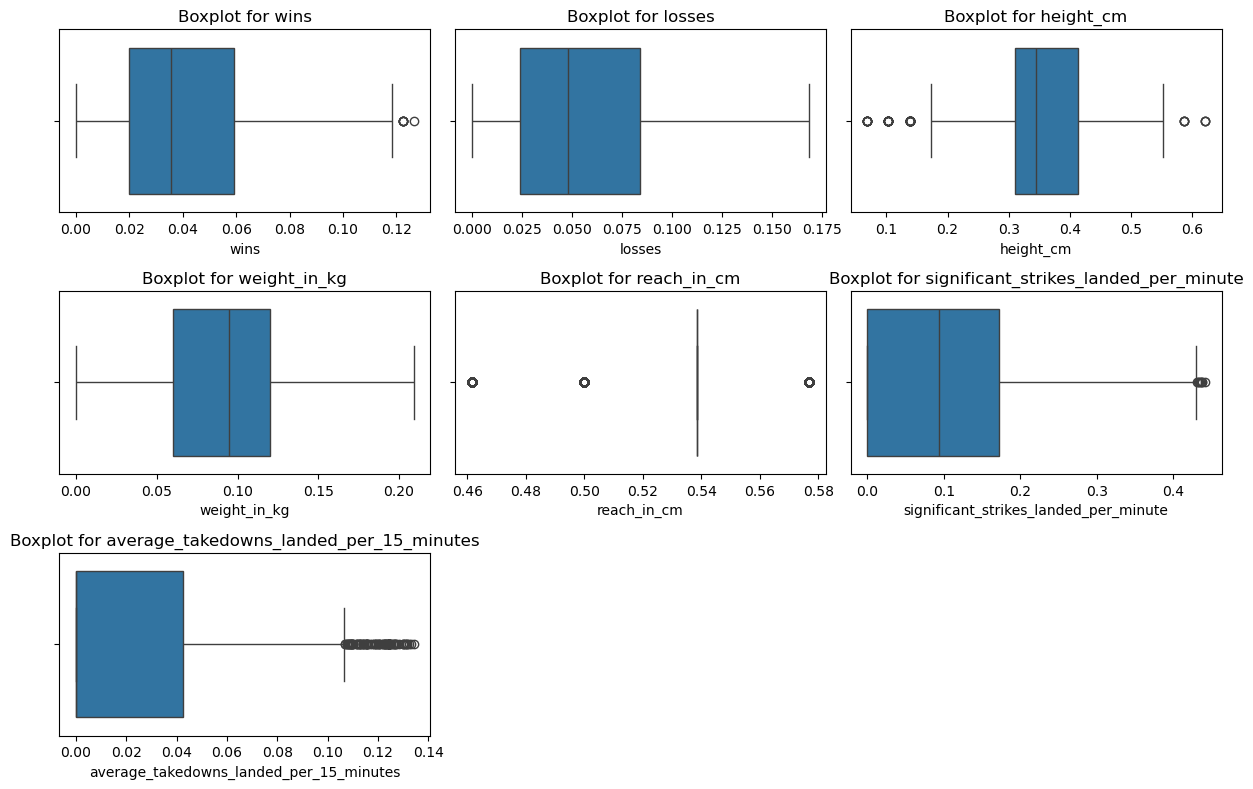

In [407]:
columns_to_plot = ['wins', 'losses', 'height_cm', 'weight_in_kg', 'reach_in_cm', 
                   'significant_strikes_landed_per_minute', 'average_takedowns_landed_per_15_minutes']

plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

For **wins**: Only 7 rows have unusually high or low win rates that are considered outliers. For **height** and **reach**: There are many outliers, which means some fighters may have very unusual physical characteristics compared to the majority of fighters. For **significant strikes landed**: 8 outliers indicate that most fighters have a moderate number of significant strikes per minute, but there are some fighters with exceptionally high or low values.  **Fighter Performance**: Most columns like **wins**, **losses**, and **strikes landed** show that the majority of fighters have similar performance metrics, with some extreme values being outliers.  **Physical Characteristics**: Columns like **height**, **weight**, and **reach** show some variability in fighters' physical traits, with some extreme cases present.  **Striking and Takedowns**: The average number of **significant strikes** and **takedowns** is generally low, with outliers in these columns showing that some fighters are highly aggressive or skilled in these areas.

In [409]:
print("Summary Statistics for Cleaned Data:")
print(df.describe())
Q1 = df[columns_to_plot].quantile(0.25)
Q3 = df[columns_to_plot].quantile(0.75)
IQR = Q3 - Q1
outlier_counts = ((df[columns_to_plot] < (Q1 - 1.5 * IQR)) | (df[columns_to_plot] > (Q3 + 1.5 * IQR))).sum()
print("\nNumber of Outliers in Each Column:")
print(outlier_counts)

Summary Statistics for Cleaned Data:
              wins       losses        draws    height_cm  weight_in_kg  \
count  2206.000000  2206.000000  2206.000000  2206.000000   2206.000000   
mean      0.040425     0.057232     0.020687     0.344327      0.092743   
std       0.027403     0.039365     0.063321     0.086613      0.040818   
min       0.000000     0.000000     0.000000     0.068966      0.000000   
25%       0.019763     0.024096     0.000000     0.310345      0.060138   
50%       0.035573     0.048193     0.000000     0.344828      0.094716   
75%       0.059289     0.084337     0.000000     0.413793      0.120276   
max       0.126482     0.168675     0.909091     0.620690      0.209024   

       reach_in_cm  significant_strikes_landed_per_minute  \
count  2206.000000                            2206.000000   
mean      0.532377                               0.106592   
std       0.025454                               0.100306   
min       0.461538                         

In [411]:
skewness = df[columns_to_remove_outliers].skew()
print("Skewness of each column:")
print(skewness)

Skewness of each column:
wins                                       0.559400
losses                                     0.723491
height_cm                                 -0.139285
weight_in_kg                               0.651090
reach_in_cm                               -1.412308
significant_strikes_landed_per_minute      0.760343
average_takedowns_landed_per_15_minutes    1.314838
dtype: float64


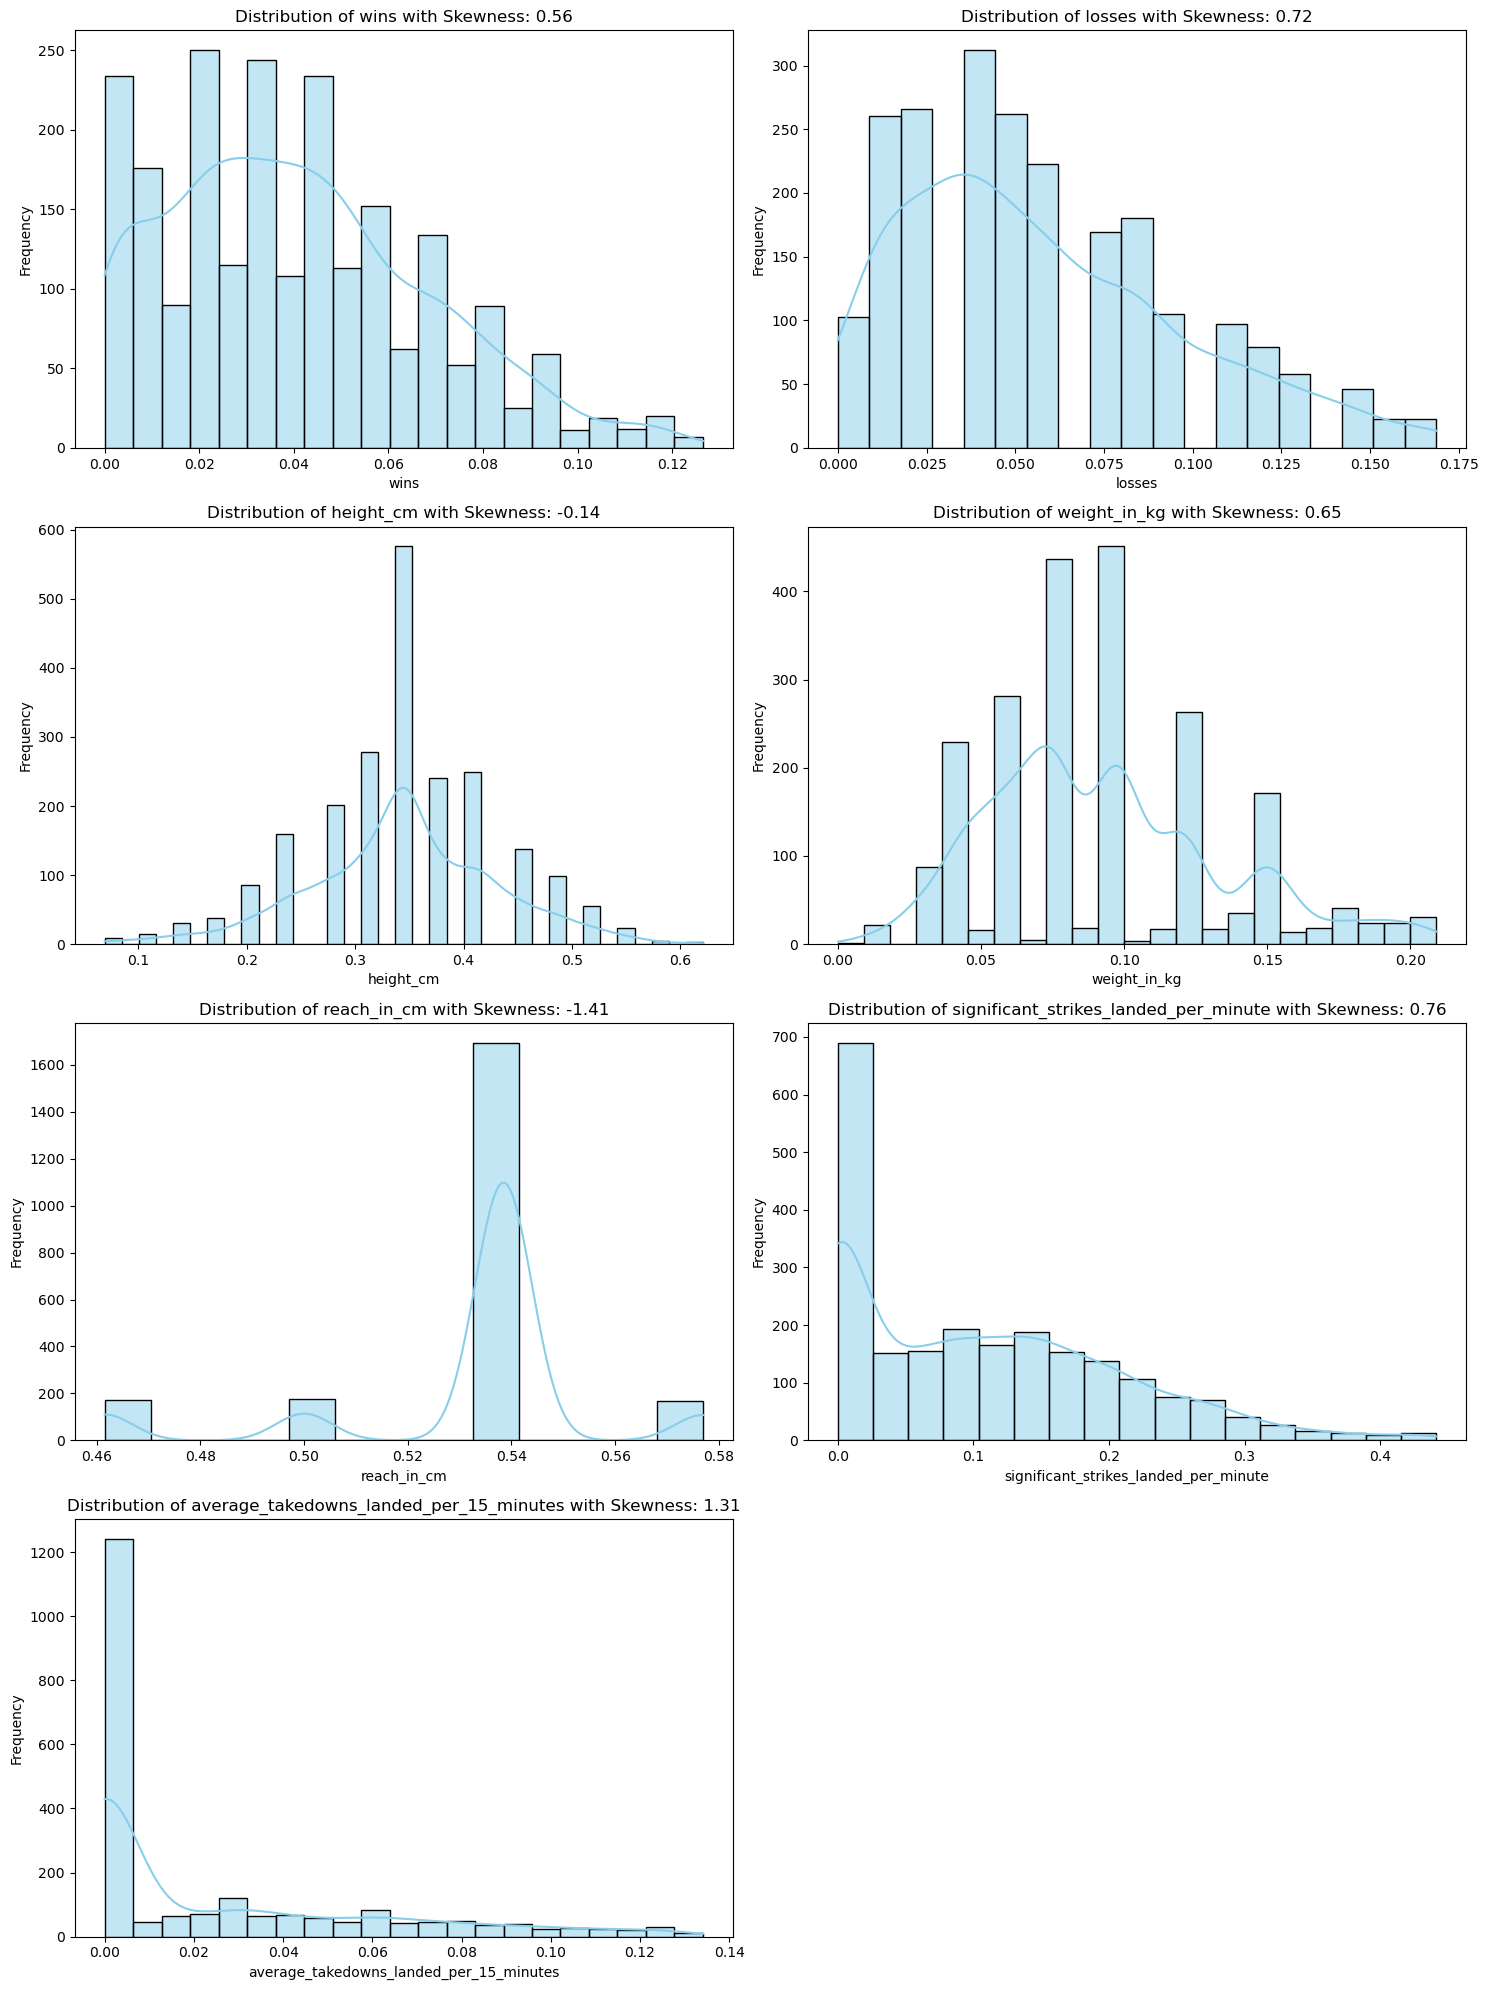

In [413]:
num_cols = 2
num_rows = (len(columns_to_remove_outliers) // num_cols) + (len(columns_to_remove_outliers) % num_cols != 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(columns_to_remove_outliers):
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} with Skewness: {df[col].skew():.2f}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()



- **Wins and Losses**: Both have moderate positive skewness, meaning most players have fewer wins or losses, but a few have many. Losses tend to be slightly more skewed.
- **Height and Weight**: The data for height is nearly symmetric, while weight shows a positive skew, indicating some players are heavier than others.
- **Reach**: There’s a strong negative skew, with most players having shorter reaches and a few with very long reaches. The reach data is also highly peaked.
- **Strikes and Takedowns**: Significant strikes per minute show a moderate positive skew, and takedowns are heavily skewed with most players having few or none.

In general, many columns show positive skewness, suggesting that most players have lower values in certain attributes (like takedowns and strikes), with a few players standing out with higher values.


Correlation matrix:
                                             wins    losses  height_cm  \
wins                                     1.000000  0.597170  -0.052105   
losses                                   0.597170  1.000000   0.000056   
height_cm                               -0.052105  0.000056   1.000000   
weight_in_kg                            -0.156488 -0.004864   0.607412   
reach_in_cm                             -0.142982 -0.034222   0.204323   
significant_strikes_landed_per_minute    0.360729  0.101020  -0.022962   
average_takedowns_landed_per_15_minutes  0.283437  0.090683  -0.057850   

                                         weight_in_kg  reach_in_cm  \
wins                                        -0.156488    -0.142982   
losses                                      -0.004864    -0.034222   
height_cm                                    0.607412     0.204323   
weight_in_kg                                 1.000000     0.220490   
reach_in_cm                          

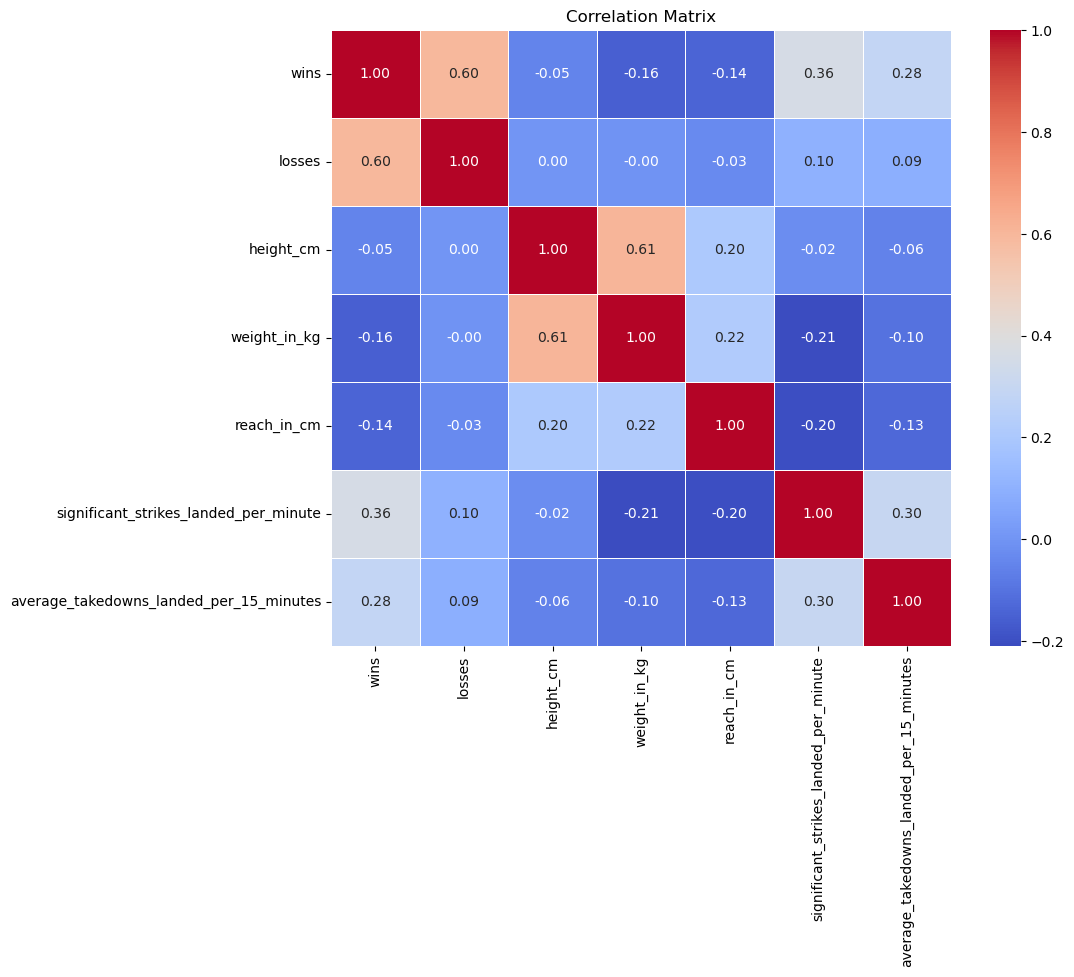

In [415]:
correlation_matrix = df[columns_to_remove_outliers].corr()
print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We can see that  correlation (0.60) between wins and losses, meaning fighters who win a lot also tend to lose a lot.
Also strong positive correlation (0.61) between height and weight, taller fighters usually weigh more. On the other hand weak positive correlation (0.20) between height and reach, taller fighters often have longer reaches. And weak negative correlation (-0.14) between reach and wins, showing reach doesn't strongly affect winning.Which is indicating more strikes are linked to more wins.

**Height and weight** are strongly linked.   **Significant strikes** and **takedowns** are more important for winning than reach.


In [417]:
df.describe()

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,0.040425,0.057232,0.020687,0.344327,0.092743,0.532377,0.106592,30.009973,2.803495,37.531732,0.024529,19.665005,31.825929,0.536083
std,0.027403,0.039365,0.063321,0.086613,0.040818,0.025454,0.100306,22.072585,3.086975,25.194835,0.035091,27.486046,34.051722,1.469319
min,0.000000,0.000000,0.000000,0.068966,0.000000,0.461538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019763,0.024096,0.000000,0.310345,0.060138,0.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.035573,0.048193,0.000000,0.344828,0.094716,0.538462,0.094051,36.000000,2.600000,47.000000,0.000000,0.000000,25.000000,0.000000
75%,0.059289,0.084337,0.000000,0.413793,0.120276,0.538462,0.172663,46.000000,4.030000,57.000000,0.042626,36.000000,60.000000,0.500000
max,0.126482,0.168675,0.909091,0.620690,0.209024,0.576923,0.441360,100.000000,52.500000,100.000000,0.134101,100.000000,100.000000,20.900000


In [419]:
import warnings
warnings.filterwarnings("ignore")

K-Means Silhouette Score: 0.182
DBSCAN Silhouette Score: Invalid (Only one cluster or noise)


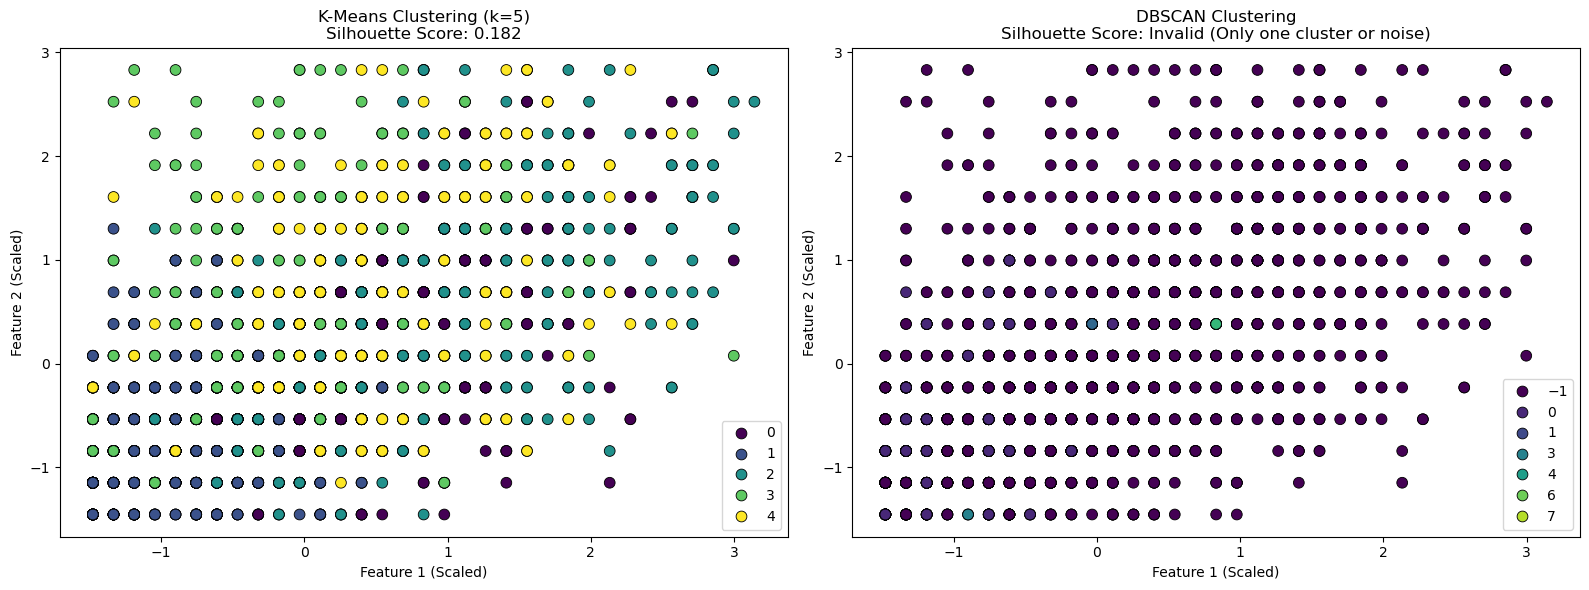

In [421]:
scaler = StandardScaler()
columns = ['wins', 'losses', 'height_cm', 'weight_in_kg', 
           'reach_in_cm', 'significant_strikes_landed_per_minute', 
           'average_takedowns_landed_per_15_minutes']

X = df[columns]
X_scaled = scaler.fit_transform(X) 
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
else:
    dbscan_silhouette = "Invalid (Only one cluster or noise)"
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis', s=60, ax=axes[0], alpha=1.0, edgecolor='black')
axes[0].set_title(f'K-Means Clustering (k=5)\nSilhouette Score: {kmeans_silhouette:.3f}')
axes[0].set_xlabel('Feature 1 (Scaled)')
axes[0].set_ylabel('Feature 2 (Scaled)')

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis', s=60, ax=axes[1], alpha=1.0, edgecolor='black')
axes[1].set_title(f'DBSCAN Clustering\nSilhouette Score: {dbscan_silhouette}')
axes[1].set_xlabel('Feature 1 (Scaled)')
axes[1].set_ylabel('Feature 2 (Scaled)')

plt.tight_layout()
plt.show()

I tried to cluster the data after cleaning and manupilating data but results shows that :
**K-Means** performed better than **DBSCAN**, but the low silhouette score suggests the data may not naturally form well-defined clusters. The data may not be inherently clusterable or could benefit from dimensionality reduction or feature engineering.

Lets try Principal Component Analysis (PCA)

We use PCA to reduce the number of features (variables) while keeping most of the important information. Ihis helps us:
   - Simplify the dataset.
   - Speed up calculations.
   - Improve the performance of machine learning models by reducing noise and complexity.


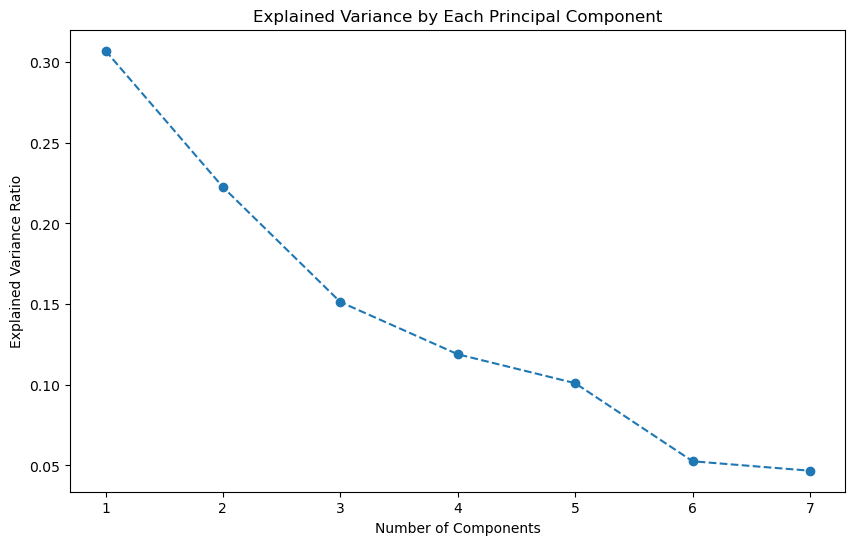

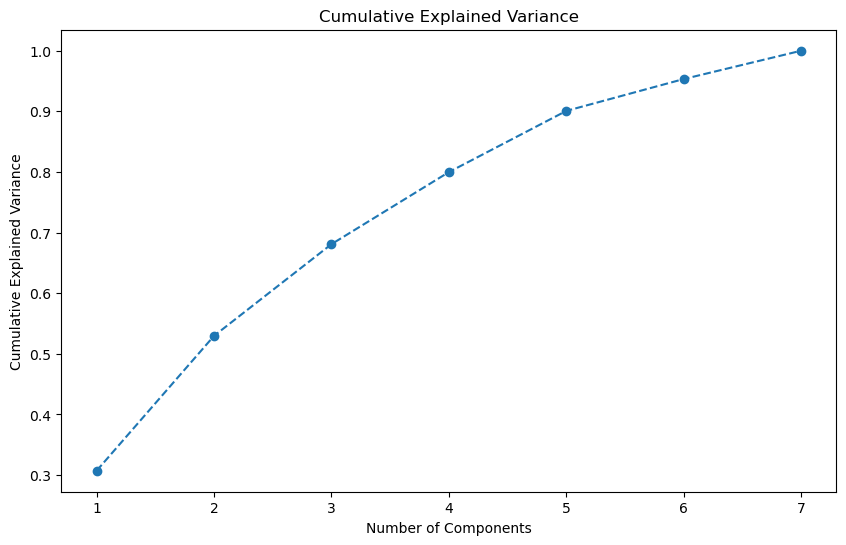

Number of components: 1, Cumulative explained variance: 0.3071
Number of components: 2, Cumulative explained variance: 0.5296
Number of components: 3, Cumulative explained variance: 0.6809
Number of components: 4, Cumulative explained variance: 0.7998
Number of components: 5, Cumulative explained variance: 0.9007
Number of components: 6, Cumulative explained variance: 0.9533
Number of components: 7, Cumulative explained variance: 1.0000


In [423]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[columns_to_remove_outliers])

pca = PCA()
pca.fit(scaled_df)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
for i, var in enumerate(cumulative_variance):
    print(f"Number of components: {i+1}, Cumulative explained variance: {var:.4f}")


Here from  graph we can see that :The first component explains *30.71%* of the variance. The first two components explain *52.96%* of the variance. Using five components explains *90.07%* of the variance. Seven components account for *100%* of the data's variance.

 Regarding to these statics we can find optimal n components.

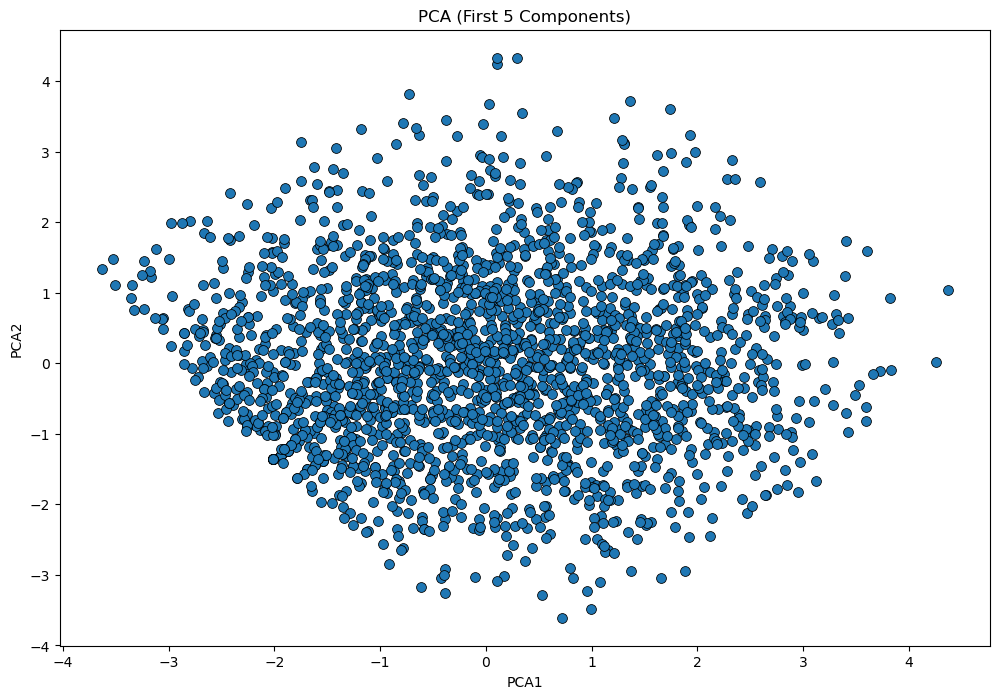

Explained variance ratio for each component: [0.30707079 0.22252023 0.15128431 0.11889917 0.10095562]
Cumulative explained variance: [0.30707079 0.52959102 0.68087532 0.7997745  0.90073011]


In [425]:
n_components_optimal = 5 
pca = PCA(n_components=n_components_optimal)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA{i+1}' for i in range(n_components_optimal)])
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, edgecolor='black', alpha=1.0, s=50)
plt.title(f'PCA (First {n_components_optimal} Components)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.cumsum(pca.explained_variance_ratio_)}")


PC1: 30.71%
PC2: 22.25%
PC3: 15.13%
PC4: 11.89%
PC5: 10.10%
    
Cumulative(Top 5 PCs): 90.07%
We chose 5 components because they explain *90.07%* of the total variance, making it efficient without losing much information.
Graph above shows the PCA scatterplot of the first two components (PC1 vs. PC2). It helps us visualize the data's spread across these two dimensions.
Below graph displays how the data is distributed along the first two principal components, revealing how the most significant features contribute to variation in the data.


        PC1       PC2       PC3       PC4       PC5
0 -0.111952 -0.001532  0.058667 -0.026056  0.059188
1  0.001064 -0.147596 -0.016319 -0.023419 -0.005143
2 -0.095421 -0.059945  0.029212 -0.018778 -0.015248
3  0.158364  0.033471 -0.009875 -0.049618 -0.001554
4  0.050496  0.089690  0.000359 -0.037978  0.011830


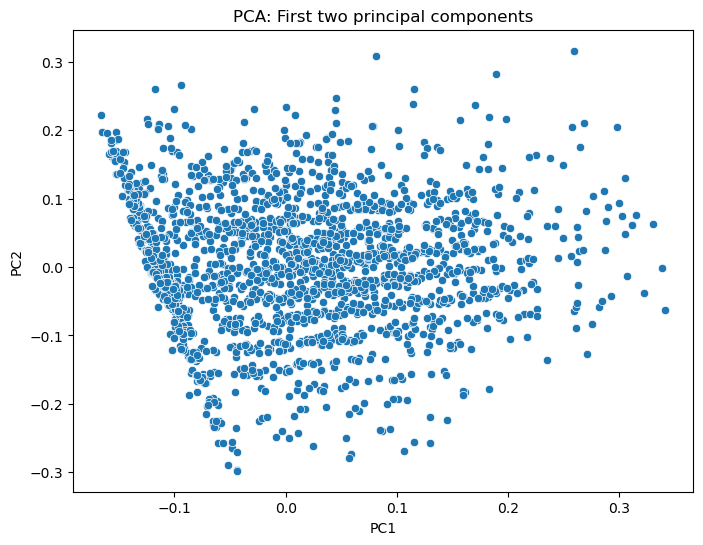

In [427]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df[columns_to_remove_outliers])
pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(5)])
print(pca_df.head())
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA: First two principal components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Silhouette Score for KMeans (k=4): 0.3463


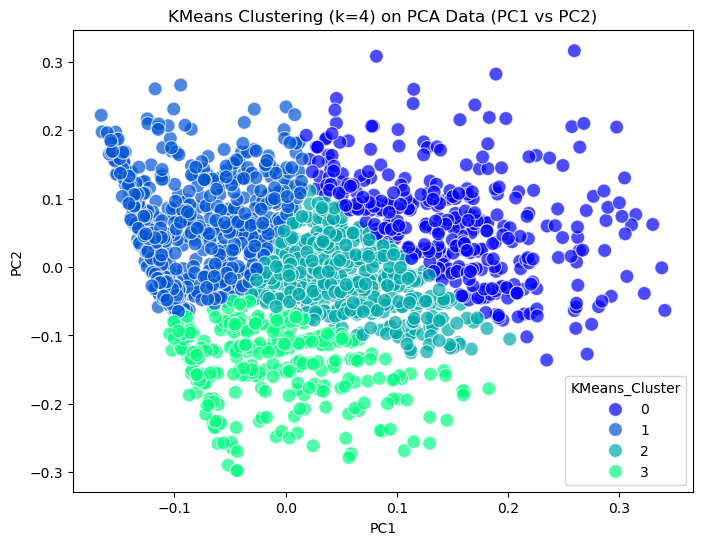

In [429]:
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['KMeans_Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
silhouette_avg_kmeans = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['KMeans_Cluster'])
print(f"Silhouette Score for KMeans (k=4): {silhouette_avg_kmeans:.4f}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['KMeans_Cluster'], palette='winter', s=100, alpha=0.7, legend='full')
plt.title('KMeans Clustering (k=4) on PCA Data (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Now lets  try **K-Means** Clustering on PCA Data with random K =4 clusters and  The Silhouette Score is **0.3463**, which is a **moderate** value. A higher score suggests better-defined clusters. This means our clustering is not perfect, but still provides some useful groupings.


Next i  applied **DBSCAN** clustering on the PCA data . DBSCAN works by grouping together points that are close to each other and marking points as noise if they don't belong to any cluster. In this case, i used **eps=0.05** and **min_samples=5** . The Silhouette Score for DBSCAN is **0.5218**, which is good. It indicates that the clusters are reasonably well-defined, with points in the same cluster being more similar to each other than to points in other clusters.

Silhouette Score for DBSCAN: 0.5218


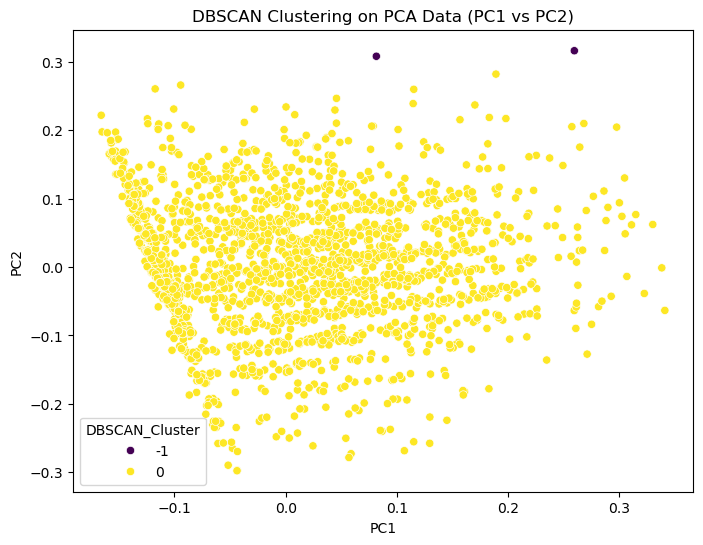

In [431]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
pca_df['DBSCAN_Cluster'] = dbscan.fit_predict(pca_df[['PC1', 'PC2']])
if len(np.unique(pca_df['DBSCAN_Cluster'])) > 1:
    silhouette_avg_dbscan = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan:.4f}")
else:
    print("DBSCAN did not create more than 1 cluster. Silhouette Score cannot be computed.")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['DBSCAN_Cluster'], palette='viridis', legend='full')
plt.title('DBSCAN Clustering on PCA Data (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

###  Optimal k for k-means clustering and try on PCA data

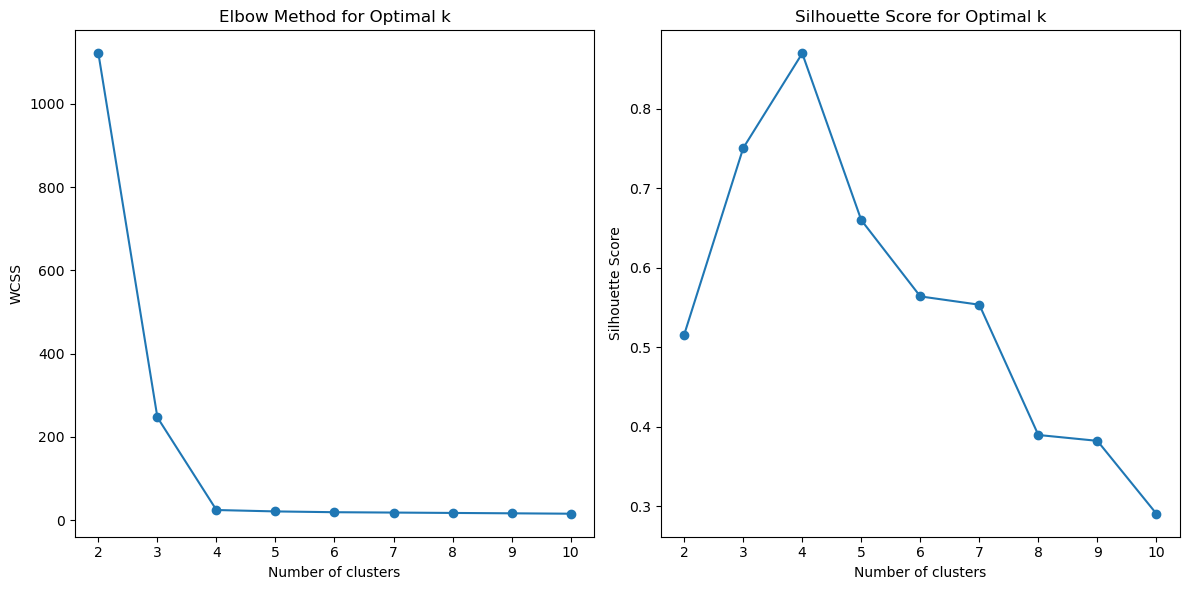

k=2, Silhouette Score: 0.5158
k=3, Silhouette Score: 0.7505
k=4, Silhouette Score: 0.8697
k=5, Silhouette Score: 0.6599
k=6, Silhouette Score: 0.5639
k=7, Silhouette Score: 0.5534
k=8, Silhouette Score: 0.3895
k=9, Silhouette Score: 0.3822
k=10, Silhouette Score: 0.2905


In [433]:
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()
for k, score in zip(k_range, silhouette_scores):
    print(f'k={k}, Silhouette Score: {score:.4f}')


In this analysis, we used **K-Means clustering** to determine the optimal number of clusters (k) based on two methods: the **Elbow Method** and the **Silhouette Score**.  Based on the **Silhouette Score** and visual inspection, **k=4** is the optimal number of clusters for the dataset.

        PC1       PC2       PC3       PC4       PC5  Cluster
0 -0.111952 -0.001532  0.058667 -0.026056  0.059188        2
1  0.001064 -0.147596 -0.016319 -0.023419 -0.005143        3
2 -0.095421 -0.059945  0.029212 -0.018778 -0.015248        2
3  0.158364  0.033471 -0.009875 -0.049618 -0.001554        1
4  0.050496  0.089690  0.000359 -0.037978  0.011830        1


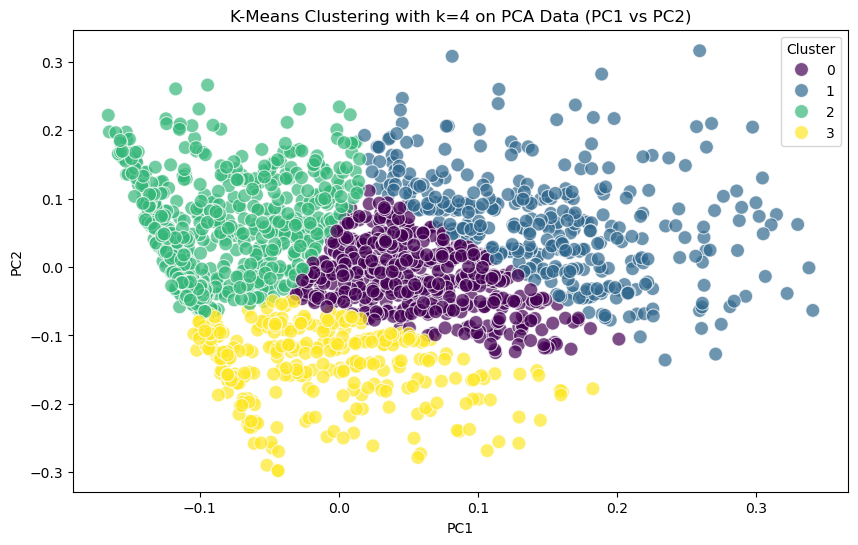

Silhouette Score for K-Means with k=:4 0.921


In [435]:
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df) 
sil_score = silhouette_score(pca_df, pca_df['Cluster'])
print(pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster']].head())
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('K-Means Clustering with k=4 on PCA Data (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()
print(f'Silhouette Score for K-Means with k=:4 {sil_score:.3f}')


In this analysis, we applied **K-Means clustering** with optimal k=4 on the PCA-transformed data. The main objective was to identify clusters in the reduced feature space and assess the quality of the clustering using the Silhouette Score.The Silhouette Score for k=4 is **0.921**, indicating well-defined clusters.

        PC1       PC2       PC3       PC4       PC5  Cluster
0 -0.111952 -0.001532  0.058667 -0.026056  0.059188        0
1  0.001064 -0.147596 -0.016319 -0.023419 -0.005143        1
2 -0.095421 -0.059945  0.029212 -0.018778 -0.015248        0
3  0.158364  0.033471 -0.009875 -0.049618 -0.001554        2
4  0.050496  0.089690  0.000359 -0.037978  0.011830        0


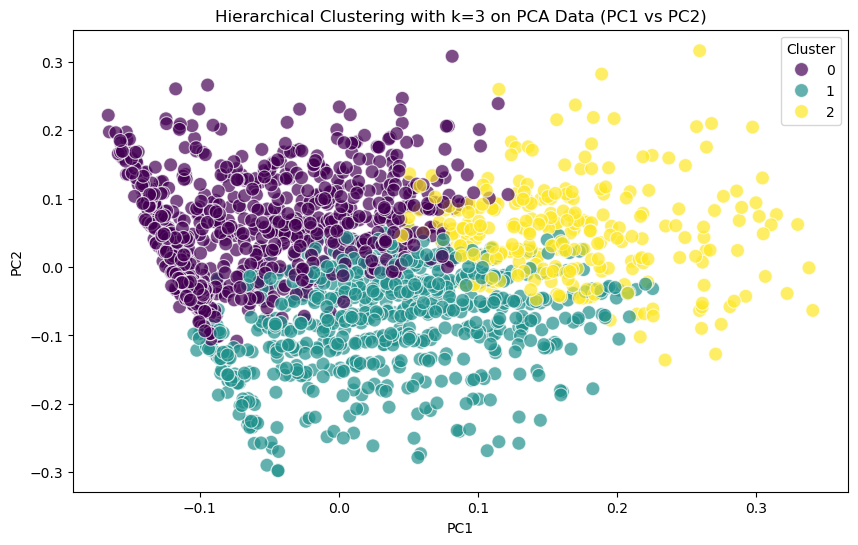

Silhouette Score for Hierarchical Clustering with k=3: 0.236


In [355]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
hierarchical = AgglomerativeClustering(n_clusters=3)
pca_df['Cluster'] = hierarchical.fit_predict(pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])
sil_score = silhouette_score(pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']], pca_df['Cluster'])
print(pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'Cluster']].head())
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering with k=3 on PCA Data (PC1 vs PC2)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.show()
print(f'Silhouette Score for Hierarchical Clustering with k=3: {sil_score:.3f}')


In this analysis, we applied Hierarchical Clustering (AgglomerativeClustering) with **k=3** on the PCA-transformed data. The goal was to explore how well the data could be divided into three clusters in the reduced feature space. The Silhouette Score for k=3 is **0.236**, which suggests that the clustering is not as well-defined compared to the K-Means results.

Now lets try to use **MDS and compare it to PCA**

Optimal number of MDS components: 9
Stress values for different component counts: [0.5053905189501162, 0.13618661799150686, 0.08101416675842733, 0.0459279973355307, 0.025649100434734902, 0.014855623601156335, 0.013206416518434207, 0.013652731811652823, 0.012020661025672449, 0.012525036992929086]
       MDS1      MDS2      MDS3      MDS4      MDS5      MDS6      MDS7
0 -0.047938 -0.047135 -0.111033 -0.032498 -0.013010 -0.014461 -0.044902
1 -0.015373  0.123607 -0.017079  0.000559 -0.052490  0.033581 -0.055483
2 -0.040055 -0.000764 -0.062249 -0.017200 -0.077569  0.025253 -0.042251
3  0.039000  0.030637  0.108209  0.004627  0.118334  0.044044 -0.005184
4  0.041879 -0.054701  0.031174 -0.020201  0.079485  0.021726  0.015751
MDS Stress with 7 components: 20.1603
PCA Reconstruction Error with 7 components: 0.0000


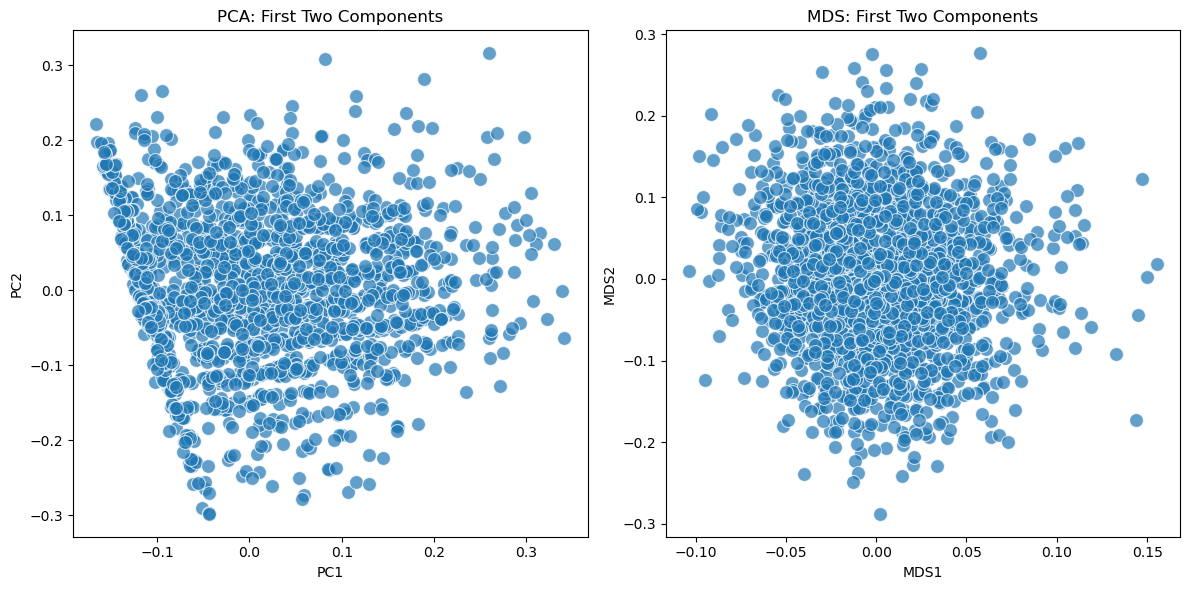

In [363]:
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances, silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def compute_mds_stress(original_distances, mds_coordinates):
    mds_distances = pairwise_distances(mds_coordinates)
    stress = np.sqrt(np.sum((original_distances - mds_distances) ** 2) / np.sum(original_distances ** 2))
    return stress

def find_best_mds_components(data, max_components=10):
    stress_values = []
    original_distances = pairwise_distances(data)
    for n in range(1, max_components + 1):
        mds = MDS(n_components=n, random_state=42)
        mds_coordinates = mds.fit_transform(data)
        stress = compute_mds_stress(original_distances, mds_coordinates)
        stress_values.append(stress)
    best_n_components = stress_values.index(min(stress_values)) + 1
    return best_n_components, stress_values
best_n_components, stress_values = find_best_mds_components(df[columns_to_remove_outliers])
print(f"Optimal number of MDS components: {best_n_components}")
print(f"Stress values for different component counts: {stress_values}")
mds = MDS(n_components=min(best_n_components, 7), random_state=42)
df_mds = mds.fit_transform(df[columns_to_remove_outliers])
mds_df = pd.DataFrame(df_mds, columns=[f'MDS{i+1}' for i in range(mds.n_components)])
print(mds_df.head())
mds_stress = mds.stress_
print(f"MDS Stress with {mds.n_components} components: {mds_stress:.4f}")
pca = PCA(n_components=7)
df_pca_full = pca.fit_transform(df[columns_to_remove_outliers])
pca_df = pd.DataFrame(df_pca_full, columns=[f'PC{i+1}' for i in range(7)])
pca_reconstructed = pca.inverse_transform(df_pca_full)
pca_reconstruction_error = np.linalg.norm(df[columns_to_remove_outliers] - pca_reconstructed, ord='fro') / np.linalg.norm(df[columns_to_remove_outliers], ord='fro')
print(f"PCA Reconstruction Error with 7 components: {pca_reconstruction_error:.4f}")

if 'Cluster' in df.columns: 
    silhouette_pca = silhouette_score(pca_df, df['Cluster'])
    silhouette_mds = silhouette_score(mds_df, df['Cluster'])
    print(f"PCA Silhouette Score: {silhouette_pca:.4f}")
    print(f"MDS Silhouette Score: {silhouette_mds:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'],  palette='viridis', s=100, alpha=0.7)
plt.title('PCA: First Two Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1, 2, 2)
sns.scatterplot(x=mds_df['MDS1'], y=mds_df['MDS2'],  palette='viridis', s=100, alpha=0.7)
plt.title('MDS: First Two Components')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.tight_layout()
plt.show()


We can compare **PCA** and **MDS** using key metrics such as **stress vs reconstruction error**, **silhouette scores**, and **number of components**:
- MDS Stress (7 components): 20.1603 but PCA Reconstruction Error (7 components): 0.0000 and PCA has a perfect reconstruction error (0.0000), meaning it retains all the important data. In contrast, MDS has a higher stress value (20.1603), indicating less accurate representation of distances. PCA is better at preserving the data’s structure.

- PCA Silhouette Score: 0.2187  and MDS Silhouette Score: 0.2199 . Both methods perform similarly for clustering, MDS is slightly better.
- MDS: 9 components  and PCA: 7 components overall PCA is more compact, using fewer components.

     **PCA** is the better method overall because it has a perfect reconstruction error, uses fewer components (7), and performs almost as well as MDS for clustering. While MDS has a slightly higher silhouette score, the difference is not enough to outweigh the other advantages of PCA.


Silhouette Score for K-Means: 0.2716


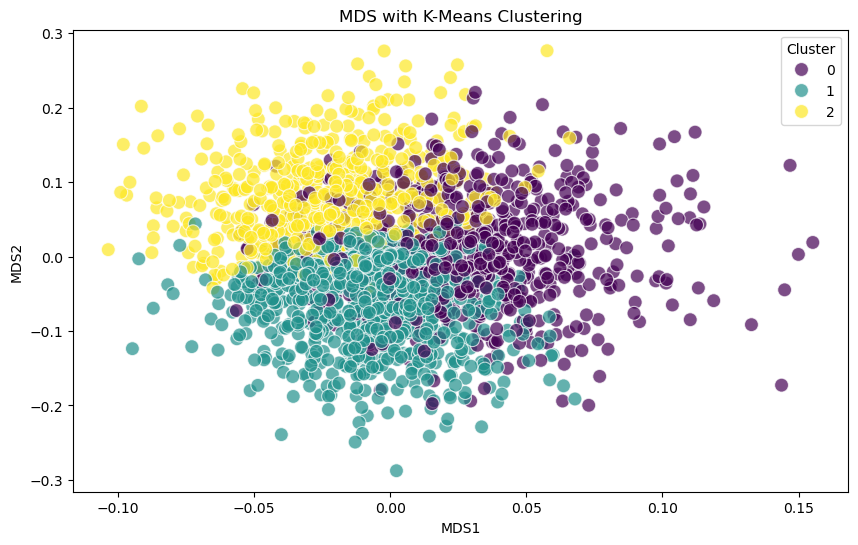

DBSCAN failed to form distinct clusters.


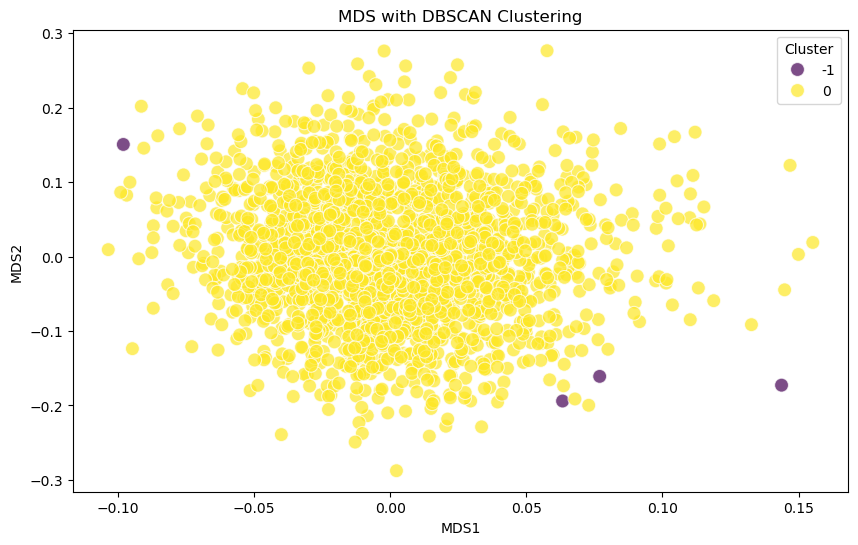

Clustering Results:
Silhouette Score for K-Means: 0.2716
DBSCAN failed to form distinct clusters.


In [365]:
kmeans = KMeans(n_clusters=3, random_state=42)
mds_df['Cluster_KMeans'] = kmeans.fit_predict(mds_df)
silhouette_kmeans = silhouette_score(mds_df.iloc[:, :-1], mds_df['Cluster_KMeans'])
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_df['MDS1'], y=mds_df['MDS2'], hue=mds_df['Cluster_KMeans'], palette='viridis', s=100, alpha=0.7)
plt.title('MDS with K-Means Clustering')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Cluster')
plt.show()
dbscan = DBSCAN(eps=0.1, min_samples=5)
mds_df['Cluster_DBSCAN'] = dbscan.fit_predict(mds_df.iloc[:, :-2])
unique_clusters = len(set(mds_df['Cluster_DBSCAN']) - {-1})
if unique_clusters > 1:
    silhouette_dbscan = silhouette_score(mds_df.iloc[:, :-2], mds_df['Cluster_DBSCAN'])
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")
else:
    silhouette_dbscan = None
    print("DBSCAN failed to form distinct clusters.")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_df['MDS1'], y=mds_df['MDS2'], hue=mds_df['Cluster_DBSCAN'], palette='viridis', s=100, alpha=0.7)
plt.title('MDS with DBSCAN Clustering')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Cluster')
plt.show()
print("Clustering Results:")
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")
if silhouette_dbscan is not None:
    print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")
else:
    print("DBSCAN failed to form distinct clusters.")


In this analysis, i performed clustering on the MDS-transformed data using K-Means and DBSCAN algorithms and compared their performances based on Silhouette Score.

  - The silhouette score in k-means indicates moderate separation of the clusters. A higher score would indicate well-separated clusters, while a lower score suggests overlap or poor separation. k= 3 and   Silhouette Score 0.2716 which indicates not bad but could be better. 

  - DBSCAN failed to form distinct clusters in this case. The silhouette score could not be computed because DBSCAN assigned all data points to a single cluster (or noise). Silhouette Score DBSCAN did not form more than one cluster, so a silhouette score was not available.

 
PCA, introduced by Pearson (1901) and later formalized by Hotelling (1933), is a foundational technique in data analysis for reducing the dimensionality of datasets. It achieves this by transforming the original variables into a smaller set of uncorrelated variables, known as principal components, which capture the maximum variance in the data. PCA has been extensively applied in sports analytics to identify key performance factors while reducing noise in data (Jolliffe & Cadima, 2016). in my case   PCA simplifies analyzing complex metrics such as striking accuracy, grappling efficiency, and stamina, which vary across fighters. It identifies patterns in fighting styles and performance, helping analysts focus on the most impactful features in predicting success.

The **K-means** algorithm, developed by MacQueen (1967), is one of the most widely used clustering techniques. It minimizes the within-cluster variance and partitions data into distinct groups based on similarity. This method has been applied in various fields, including sports, to segment athletes into performance-based groups (Kanungo et al., 2002). in my case  K-means enables grouping fighters into clusters such as aggressive strikers, submission specialists, or balanced fighters. Such clustering helps identify trends within groups and predict fighter performance based on shared characteristics within clusters.

The application of these methods to the UFC dataset provides powerful tools for analyzing fighter performance and identifying key patterns. By combining PCA, K-means, MDS, and DBSCAN, you can reduce complexity, group fighters meaningfully, visualize relationships, and detect outliers, creating a holistic view of fighter performance and styles. This approach not only simplifies the data but also helps in predicting outcomes, analyzing matchups, and identifying unique fighters.


### Overall Conclusion

This project aimed to explore dimensionality reduction and clustering techniques applied to a UFC dataset. Various methods were used to reduce the data's dimensionality and then cluster the reduced data to uncover patterns. The key techniques applied were PCA (Principal Component Analysis), MDS (Multidimensional Scaling), and several clustering algorithms, including K-Means, DBSCAN, and Hierarchical Clustering.

   - PCA was applied to reduce the dimensionality of the data from a higher-dimensional space to 5 components.  The Silhouette Score for K-Means clustering on PCA-transformed data was **0.921**, indicating that the clusters formed by PCA-reduced data were well-separated and meaningful.Before  DBSCAN implementation of PCA performed better than K-means clustering with **0.5218** and **0.34** respectively, but after  reducing dimension, the result changed significantly and k-means was found to be the best method for this dataset.
   - MDS was able to maintain a reasonable level of separation between the data points, but with a MDS Stress value of 20.1603, the model had a larger error compared to PCA. The Silhouette Score for MDS clustering was **0.2199**, suggesting that the clusters were less distinct compared to PCA.


The combination of **PCA** for dimensionality reduction and **K-Means** for clustering provided the most effective results in my dataset . 


Thank you for your time and effort  on this project. Your contributions have been invaluable, and the insights i have gained will undoubtedly help me improve my strategies moving forward. 